<a href="https://colab.research.google.com/github/GroupARNruppin/LastFm/blob/main/LastFm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

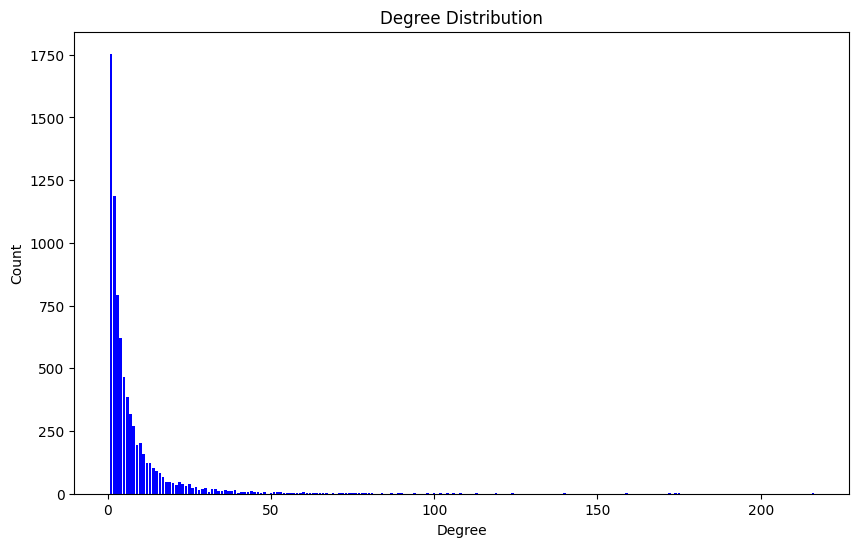

,Number of Nodes,Number of Edges,Density,Transitivity,Average Clustering Coefficient
0,7624,27806,0.000957,0.178623,0.219418


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# טעינת נתוני LastFM
edges = pd.read_csv('/content/data/lastfm_asia_edges.csv')
targets = pd.read_csv('/content/data/lastfm_asia_target.csv')

# יצירת גרף מהנתונים
G = nx.from_pandas_edgelist(edges, 'node_1', 'node_2')

# סטטיסטיקות בסיסיות של הגרף
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
transitivity = nx.transitivity(G)
average_clustering = nx.average_clustering(G)

# התפלגות דרגות הצמתים
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = pd.Series(degree_sequence).value_counts().sort_index()

# הצגת התפלגות דרגות הצמתים
plt.figure(figsize=(10, 6))
plt.bar(degree_count.index, degree_count.values, width=0.80, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# הצגת תוצאות הניתוח
graph_stats = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Density": density,
    "Transitivity": transitivity,
    "Average Clustering Coefficient": average_clustering
}

# הצגת הסטטיסטיקות
graph_stats_df = pd.DataFrame(graph_stats, index=[0])

graph_stats_df